In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
# loading the dataset

df = pd.read_csv("D:\Data Projects\Practice Files\Restaurants Revenue Prediction\Restaurant_revenue (1).csv")
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [7]:
# checking for any null values

df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [8]:
# checking for any duplicate values

df.duplicated().sum()

0

<Axes: >

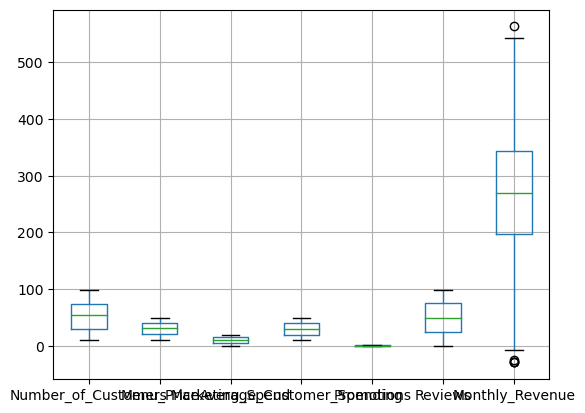

In [9]:
# checking for outliers

df.boxplot()

In [10]:
# dealing with outliers

q1 = df["Monthly_Revenue"].quantile(0.25)
q3 = df["Monthly_Revenue"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

df.loc[(df["Monthly_Revenue"] > upper_limit) | (df["Monthly_Revenue"]<lower_limit)]

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
54,11,32.620334,5.061169,American,33.761979,1,87,-28.977809
84,96,16.620820,16.610689,Japanese,12.284687,0,23,563.381332
104,10,11.313867,2.279133,Italian,16.075447,1,24,-27.610276
110,17,22.458927,0.874713,American,35.280768,1,57,-25.453430
605,13,36.130521,0.811175,Mexican,43.119059,1,12,-28.920890


In [11]:
df1 = df.loc[(df["Monthly_Revenue"] < upper_limit) & (df["Monthly_Revenue"] > lower_limit)]

print("before removing outliers:",len(df))
print("after removing outliers:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outliers: 1000
after removing outliers: 995
outliers: 5


In [ ]:
# Due to the limited size of the dataset, I only focused on the Monthly_Revenue column.

In [ ]:
# Visualizing the dataset

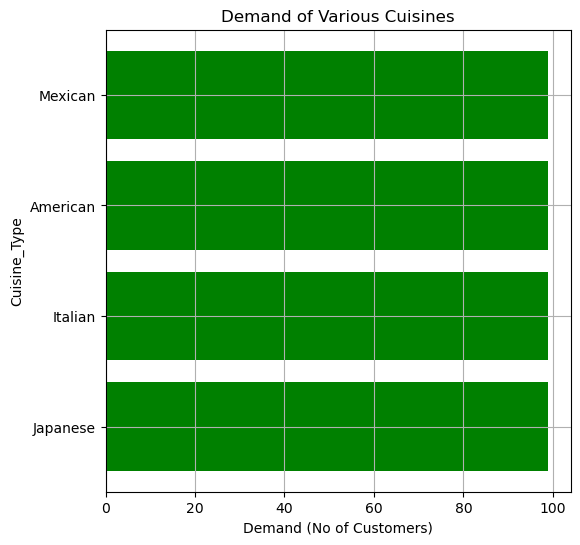

In [12]:
## Which cuisine is mostly preferred by customers

plt.figure(figsize=(6,6))
plt.barh(df1["Cuisine_Type"], df1["Number_of_Customers"], color = "green")
plt.xlabel("Demand (No of Customers)")
plt.ylabel("Cuisine_Type")
plt.grid(True)
plt.title("Demand of Various Cuisines")
plt.show()

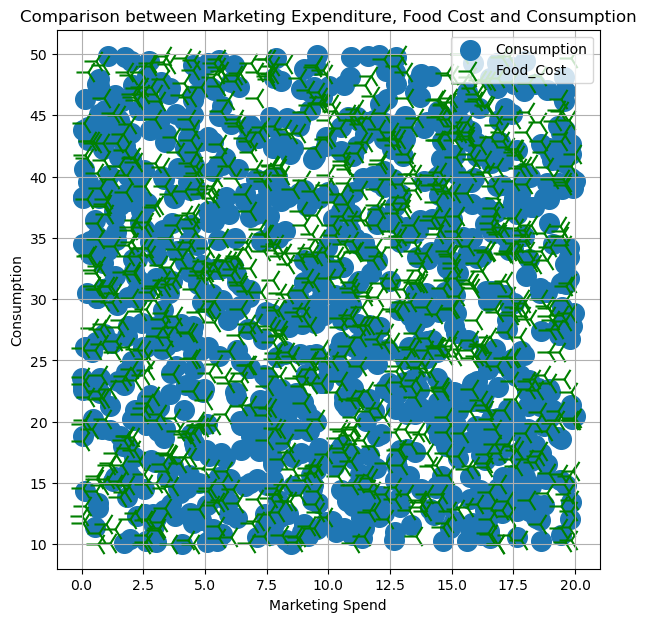

In [13]:
## Comparison between Marketing Expenditure, Food Cost and Consumption

Food_Cost = df1["Menu_Price"]
Consumption = df1["Average_Customer_Spending"]

plt.figure(figsize=(7,7))
plt.scatter(df1["Marketing_Spend"], df1["Average_Customer_Spending"], s=200)
plt.scatter(df1["Marketing_Spend"], df1["Menu_Price"], s=300, marker="3", color = "green")
plt.xlabel("Marketing Spend")
plt.ylabel("Consumption")
plt.legend(["Consumption", "Food_Cost"])
plt.grid(True)
plt.title("Comparison between Marketing Expenditure, Food Cost and Consumption")
plt.show()

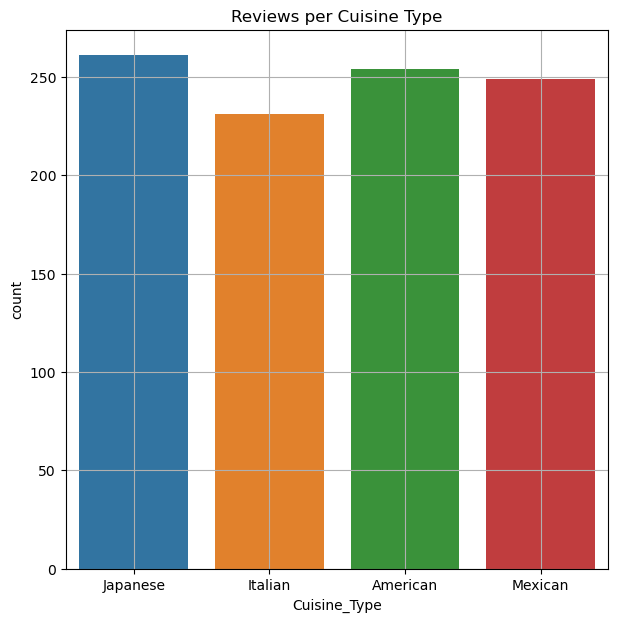

In [14]:
## No of Promotions per Cuisine 

plt.figure(figsize=(7,7))
sns.countplot(x = df1["Cuisine_Type"], data = df1["Reviews"])
plt.grid(True)
plt.title("Reviews per Cuisine Type")
plt.show()

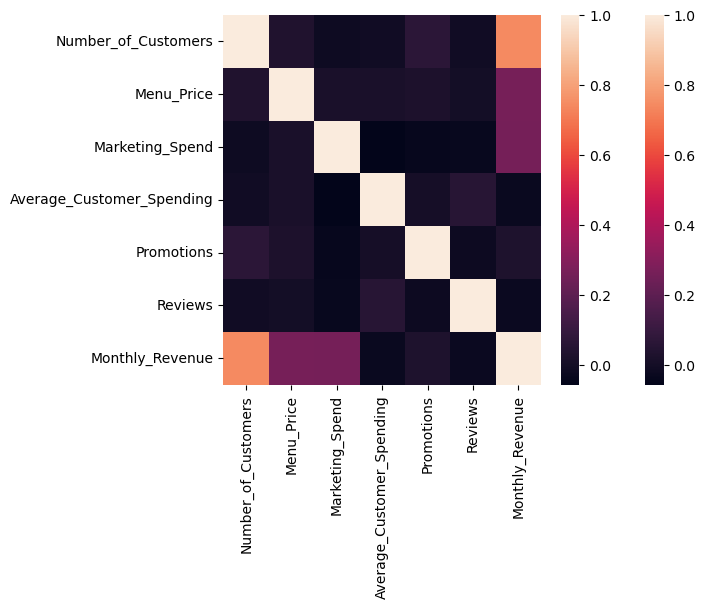

In [26]:
# Checking for Correlations among the variables.

df2 = df1.drop(["Cuisine_Type"], axis = 1)

sns.heatmap(df2.corr())
plt.show()